In [1]:
from gensim.models import Word2Vec
import string
import re
from nltk.corpus import stopwords
with open(r'F:/resume-ranking/skills.txt',encoding="utf8") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]

C:\Users\FAITH KATHERINE\AppData\Local\Programs\Python\Python37\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
content[1]

'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.'

In [3]:
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.phrases import Phraser, Phrases

In [4]:
x=[]
for line in content:
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    x.append(words)

In [5]:
texts=x

In [6]:
print(texts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


**Removing commonly occuring words that are not useful**

In [7]:
with open('common.txt') as f:
    content2 = f.read()
ntexts=[]
l=len(texts)
for j in range(l):
    s=texts[j]
    res = [i for i in s if i not in content2]
    ntexts.append(res)
print(texts[6])

    

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [8]:
print(ntexts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [9]:
print(len(ntexts))
texts=ntexts

316


In [10]:
content=texts

**Creating bigrams**

In [11]:
common_terms = ["of", "with", "without", "and", "or", "the", "a"]
x=ntexts
# Create the relevant phrases from the list of sentences:
phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences
all_sentences = list(bigram[x])
model=gensim.models.Word2Vec(all_sentences,size=5000,min_count=2,workers=4,window=4)
model.save("final.model")
wrds=list(model.wv.vocab)
print(len(wrds))

C:\Users\FAITH KATHERINE\AppData\Local\Programs\Python\Python37\lib\site-packages\gensim\models\base_any2vec.py:323: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


1240


**Testing**

In [12]:
z=model.wv.most_similar("machine_learning")

In [13]:
print(z)

[('system', 0.13348495960235596), ('development', 0.13225235044956207), ('information', 0.12860742211341858), ('may', 0.12439693510532379), ('deep_neural', 0.1224866509437561), ('methods', 0.12215884029865265), ('code', 0.11777926236391068), ('used', 0.11753009259700775), ('deep_learning', 0.11723548173904419), ('software', 0.11537247151136398)]


### Resume Parsing

In [14]:
import PyPDF2
import os
import collections
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

**Reading Resumes from folder**

In [15]:
mypath=r'D:/FINAL YEAR PROJECT/Resumes/NewTestData'
#Path for the files
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]


**Function to words from resume**

In [16]:
import collections
'''def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    for i in c:
        #page
        page = read_pdf.getPage(i)
        page_content = page.extractText()
    return (page_content.encode('utf-8'))'''

def pdfextract(file):
    dummy=''
    pdffile=open(file,'rb')
    pdfReader=PyPDF2.PdfFileReader(pdffile)
    count=(pdfReader.numPages)
    for i in range(count):
        pageObj=pdfReader.getPage(i)
        dummy+=(pageObj.extractText())
    return(dummy)

In [17]:
sim_words=[k[0] for k in model.wv.most_similar("machine_learning")]

In [18]:
def create_bigram(words):
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    x=words.split()
# Create the relevant phrases from the list of sentences:
    phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
    bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
    all_sentences = list(bigram[x])
    
    

**Function to build candidate profile**

In [19]:
def create_profile(file):
    model=Word2Vec.load("final.model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "")
    text = text.lower()
    #print(text)
    #text=create_bigram(text)
    #print(text)
    #below is the csv where we have all the keywords, you can customize your own
    #keyword_dictionary = pd.read_csv(r'C:\Users\dell\Desktop\New folder\ML_CS\NLP\technical_skills.csv')
    stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
    NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
    ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
    DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
    #R = [nlp(text) for text in keyword_dictionary['R Language'].dropna(axis = 0)]
    python = [nlp(text[0]) for text in model.wv.most_similar("python")]
    Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]
    print("*******************************************")
    #print(stats_words,NLP_words)
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats)
    matcher.add('NLP', None, *NLP)
    matcher.add('ML', None, *ML)
    matcher.add('DL', None, *DL)
    matcher.add('Python', None, *python)
    matcher.add('DE', None, *Data_Engineering)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode I
        span = doc[start : end]               # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    print("KEYWORDS")
    print(keywords)
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    print("********************DF********************")
    print(df)
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
    
       
    name = filename.split('_')
    print(name)
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    print("******************DATAF**************")
    print(dataf)

    return(dataf)

**Code to execute the above functions**

In [20]:
#Code to execute the above functions 
final_db=pd.DataFrame()
i=0
while i < len(onlyfiles):
    file=onlyfiles[i]
    dat=create_profile(file)

    final_db=final_db.append(dat)
    i+=1
    #print(final_db)

*******************************************
KEYWORDS

********************DF********************
Empty DataFrame
Columns: [Keywords_List]
Index: []
['1']
******************DATAF**************
   Candidate Name Subject Keyword Count
0               1     NaN     NaN   NaN
*******************************************
KEYWORDS

********************DF********************
Empty DataFrame
Columns: [Keywords_List]
Index: []
['10']
******************DATAF**************
   Candidate Name Subject Keyword Count
0              10     NaN     NaN   NaN
*******************************************
KEYWORDS
Stats programming (1)
DE language (2)
Python language (2)
ML information (1)
NLP information (1)
Stats information (1)
DE information (1)
DL information (1)
********************DF********************
           Keywords_List
0  Stats programming (1)
1        DE language (2)
2    Python language (2)
3     ML information (1)
4    NLP information (1)
5  Stats information (1)
6     DE information (1)
7 

PdfReadError: EOF marker not found

**Counting words under each category and building the candidate profile**

In [21]:
#Code to count words under each category and visualize it through MAtplotlib
final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
final_db2.reset_index(inplace = True)
final_db2.fillna(0,inplace=True)
candidate_data = final_db2.iloc[:,1:]
candidate_data.index = final_db2['Candidate Name']
#the candidate profile in a csv format
cand=candidate_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

,Candidate Name,DE,DL,ML,NLP,Python,Stats
0,2.0,2,1,1,1,1,2
1,8.0,3,4,3,4,4,4


**Visualizing by matplotlib**

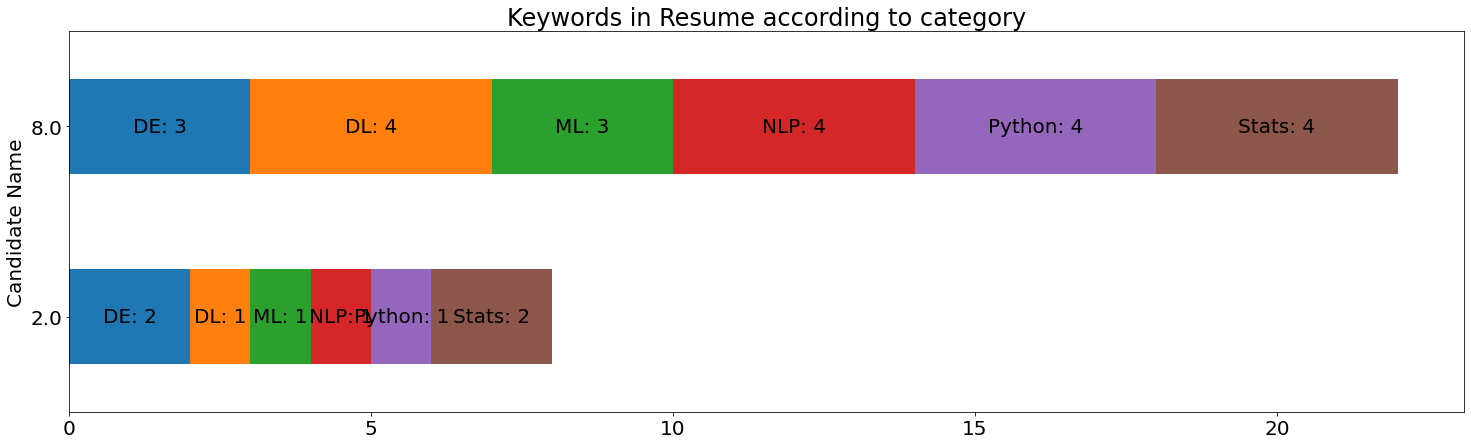

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
ax = candidate_data.plot.barh(title="Keywords in Resume according to category", legend=False, figsize=(25,7), stacked=True)
skills = []
for j in candidate_data.columns:
    for i in candidate_data.index:
        skill = str(j)+": " + str(candidate_data.loc[i][j])
        skills.append(skill)
patches = ax.patches
for skill, rect in zip(skills, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center')
plt.show()